In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

### Randomized Controlled Trial to study the impact of a certain treatment for back pain

https://www.ncbi.nlm.nih.gov/pubmed/11376175

In [0]:
# Groups (Control and Treatment)
# Result (Improvement is 1.0 and No improvement = 0.0)
bta = pd.read_csv('bta.csv')
bta

,Group,Result
0,Control,1.0
1,Control,1.0
2,Control,0.0
3,Control,0.0
4,Control,0.0
5,Control,0.0
6,Control,0.0
7,Control,0.0
8,Control,0.0
9,Control,0.0


In [0]:
# Average improvements for the control and treatment groups
bta.groupby('Group').mean()

,Result
Group,
Control,0.125
Treatment,0.600


The difference in mean between the control and the treatment group is 0.6 - 0.125 = 0.475. 
Is this by chance ? or is this is due to the Botulinum toxin A treatment. 
So one way to find out this is to randomize the groups and by shuffling them and pick 15 of them randomly as control and rest as treatment. Obtain the statistic and repeat it several times.

In [0]:
def difference_in_means(df, group_column):
  items = df.groupby(group_column).mean().values
  return abs(items[0] - items[1])[0]

observed_difference = difference_in_means(bta, 'Group')
print(f'observed_difference = {observed_difference:>.5f}')

observed_difference = 0.47500


In [0]:
def randomize_the_group_label():
  new_shuffled_group = bta.sample(replace=False, frac=1.0)['Group']
  bta['new_shuffled_group'] = new_shuffled_group.values
  return bta

randomize_the_group_label()

,Group,Result,new_shuffled_group
0,Control,1.0,Treatment
1,Control,1.0,Control
2,Control,0.0,Treatment
3,Control,0.0,Treatment
4,Control,0.0,Treatment
5,Control,0.0,Control
6,Control,0.0,Control
7,Control,0.0,Control
8,Control,0.0,Treatment
9,Control,0.0,Control


In [0]:
difference_in_means(bta, 'new_shuffled_group')

0.041666666666666685

In [0]:
# Let us simulate this multiple repetitions
repetitions = 10000
differences = []
for i in np.arange(repetitions):
  shuffled_data = randomize_the_group_label()
  difference = difference_in_means(bta, 'new_shuffled_group')
  differences.append(difference)

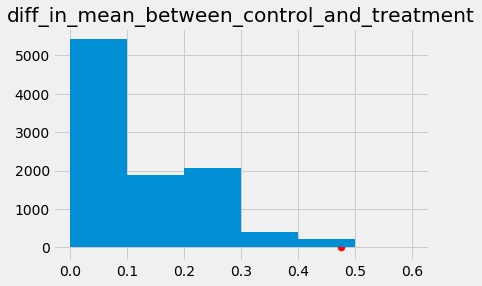

In [0]:
# plot the distribution of the differences in means
pd.DataFrame(differences, columns=['diff_in_mean_between_control_and_treatment']).hist(bins=np.arange(0, 0.7, 0.1))
plt.scatter(observed_difference,0,color='red', s=50);

From the above plot the observed difference is quite far off from the randomized shuffled result and also since it is a Randomized Controlled experiment, we could safely conclude the BTA is the cause for improvements in treatment group.